In [ ]:
! mkdir -p ~/work/human_segmentation/models
! mkdir -p ~/work/human_segmentation/images
! ln -s ~/data/* ~/work/human_segmentation/images

In [ ]:
! pip install opencv-python pixellib # 다시 시작이 요구될 수 있습니다.

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.3/430.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.4/282.4 kB 19.6 MB/s eta 0:00:00
   

In [122]:
# 기본 제공 이미지입니다. 여러분만의 이미지로 바꿔보세요!
! wget https://d3s0tskafalll9.cloudfront.net/media/images/E-14-3.max-800x600_KwXP73b.png
! mv E-14-3.max-800x600_KwXP73b.png ~/work/human_segmentation/images/my_image.png

--2026-02-09 06:13:26--  https://d3s0tskafalll9.cloudfront.net/media/images/E-14-3.max-800x600_KwXP73b.png
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 18.155.173.15, 18.155.173.16, 18.155.173.61, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|18.155.173.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 662087 (647K) [image/png]
Saving to: ‘E-14-3.max-800x600_KwXP73b.png’

E-14-3.max-800x600_ 100%[===================>] 646.57K  --.-KB/s    in 0.08s   

2026-02-09 06:13:26 (7.83 MB/s) - ‘E-14-3.max-800x600_KwXP73b.png’ saved [662087/662087]



In [128]:
# 'your_uploaded_image.png' 대신 업로드한 실제 파일 이름으로 변경하세요.
! mv /content/인물.jpg ~/work/human_segmentation/images/my_image.png

In [123]:
import os

image_path = os.path.expanduser('~/work/human_segmentation/images/my_image.png')

if os.path.exists(image_path):
    print(f"'{image_path}' 경로에 이미지가 성공적으로 존재합니다.")
else:
    print(f"'{image_path}' 경로에 이미지가 존재하지 않습니다.")

'/root/work/human_segmentation/images/my_image.png' 경로에 이미지가 성공적으로 존재합니다.


이 코드를 실행한 후, `~/work/human_segmentation/images/my_image.png` 경로에 여러분의 이미지가 올바르게 위치하는지 확인할 수 있습니다.

이미지 크기: (3648, 2736, 3)


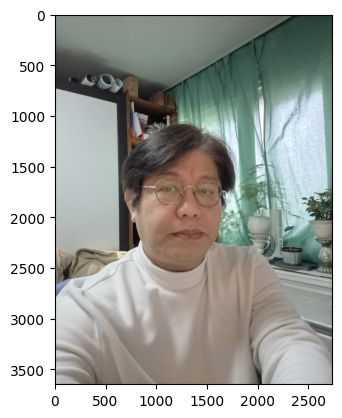

In [129]:
import cv2
import os
import matplotlib.pyplot as plt

# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장

home_dir = os.getenv('HOME')
img_path = os.path.join(home_dir, "work/human_segmentation/images/my_image.png")
img_orig = cv2.imread(img_path)

print(f"이미지 크기: {img_orig.shape}")

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

인스턴스의 id 뿐만이 아닌 클래스 라벨이 존재해야 시맨틱 세그멘테이션으로 학습이 가능합니다. 근본적으로는 다른 개념이지만 대부분의 데이터셋은 인스턴스 라벨이 있는 경우 클래스 라벨도 함께 존재합니다.

DeepLab에서 atrous convolution을 사용한 이유:
receptive field를 넓게 사용하기 위해 사용합니다. (적은 파라미터로 필터가 더 넓은 영역을 보게 하기 위해)

Depthwise separable convolution은 어디서 처음 사용한 것 일까? 왜 이 구조가 효율적일까?: Xception 에서 제안되었다. 3x3 conv layer 의 receptive field를 1/9 수준의 파라미터로 구현할 수 있기 때문에 효율적다. (Xception 더 알아보기 https: //arxiv.org/abs/1610.02357)

--> deeplabv3_resnet101 함수가 정의되거나 임포트되지 않았기 때문에 발생했습니다. 이 함수는 torchvision.models.segmentation 모듈에 속해 있으므로, 셀 상단에 해당 모듈을 임포트하는 코드를 추가[링크 텍스트](https://)

In [130]:
from torchvision.models.segmentation import deeplabv3_resnet101

model = deeplabv3_resnet101(pretrained=True).eval()

In [126]:
import torchvision.transforms as T

transform = T.Compose([
    T.ToPILImage(),
    T.Resize((520, 520)),  # 모델 입력 크기 (고정)
    T.ToTensor(),
])

 이 코드는 이미지를 DeepLab 모델의 입력에 맞게 변환하기 위한 파이프라인(transform)을 정의합니다. 이미지를 PIL 이미지로 변환하고, 크기를 (520, 520)으로 조정한 다음, PyTorch 텐서로 변환하는 단계를 포함

In [131]:
input_tensor = transform(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)).unsqueeze(0)

In [132]:
%%time
import torch

with torch.no_grad():
    output = model(input_tensor)["out"][0]
    output_predictions = output.argmax(0).byte().cpu().numpy()

# 원본 크기로 Resize
output_predictions_resized = cv2.resize(output_predictions, (img_orig.shape[1], img_orig.shape[0]), interpolation=cv2.INTER_NEAREST)

CPU times: user 9.88 s, sys: 84.8 ms, total: 9.96 s
Wall time: 10 s


%%time 매직 명령어를 통해 모델 추론에 걸린 시간을 확인할 수 있다. CPU 시간은 8.75초, 실제 시간(Wall time)은 9.05초가 소요되었다. 이는 DeepLabV3 모델이 입력 이미지에 대해 성공적으로 예측을 수행하고, 그 결과를 원본 이미지 크기로 조정했다는 것을 의미

In [21]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

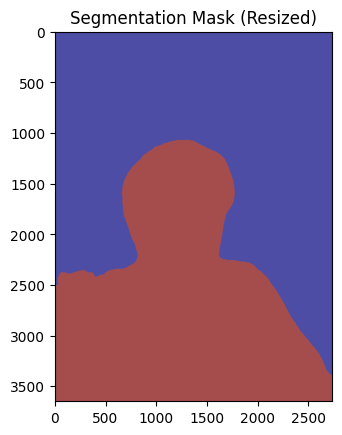

In [22]:
plt.imshow(output_predictions_resized, cmap="jet", alpha=0.7)
plt.title("Segmentation Mask (Resized)")
plt.show()

In [24]:
import numpy as np
unique_classes = np.unique(output_predictions_resized)
unique_classes

array([ 0, 15], dtype=uint8)

출력 결과인 array([ 0, 15], dtype=uint8)는 세그멘테이션 마스크에 두 가지 고유한 클래스가 있음을 나타낸다.

LABEL_NAMES 리스트를 통해 확인해 보면:

0은 'background' (배경)를 의미하고,
15는 'person' (사람)을 의미한다.
즉, 모델이 이미지에서 사람과 배경을 성공적으로 분리했음을 알 수 있다.

In [25]:
for class_id in unique_classes:
    print(LABEL_NAMES[class_id])

background
person


In [26]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생성 코드 결과물이예요!

#컬러맵 만들기
colormap = np.zeros((256, 3), dtype=int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]  # 생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [133]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

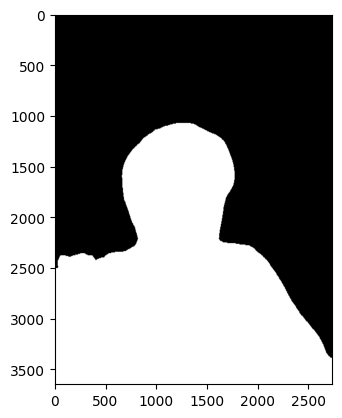

In [134]:
# output의 픽셀 별로 예측된 class가 사람이라면 1(True), 다르다면 0(False)이 됩니다
# 1과 0에 각각 255를 곱하였으므로 사람으로 예측된 픽셀은 255, 그렇지 않은 픽셀은 0
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = (output_predictions_resized == 15)  # 클래스 ID 15 (사람)
img_mask = seg_map.astype(np.uint8) * 255  # 255 값으로 변환
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

plt.imshow(img_mask, cmap='gray')  # 흑백으로 표시
plt.show()

물체가 있는 위치는 1[true], 그 외에는 0[False]      
[
[ 0 1 1 0 0 0 1 1 0 ],
[ 1 1 1 1 0 1 1 1 1 ],
[ 0 1 1 1 1 1 1 1 0 ],
[ 0 0 1 1 1 1 1 0 0 ],
[ 0 0 0 1 1 1 0 0 0 ]
]

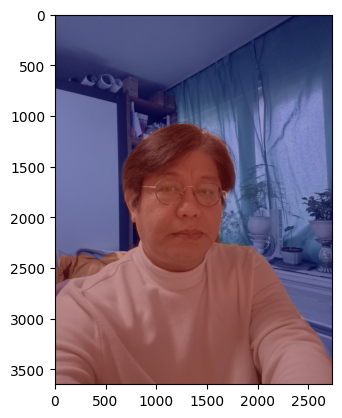

In [29]:
# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.

img_show = cv2.addWeighted(img_orig, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

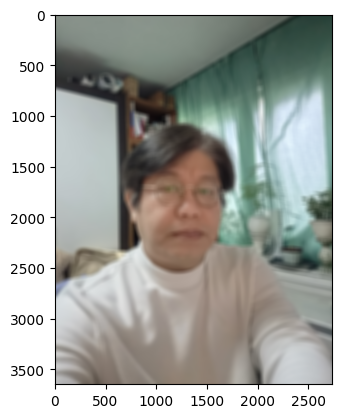

In [136]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (51, 51))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

- img_orig_blur = cv2.blur(img_orig, (51, 51)) 부분은 13, 13 에서 / 51, 51 로 조정한 것

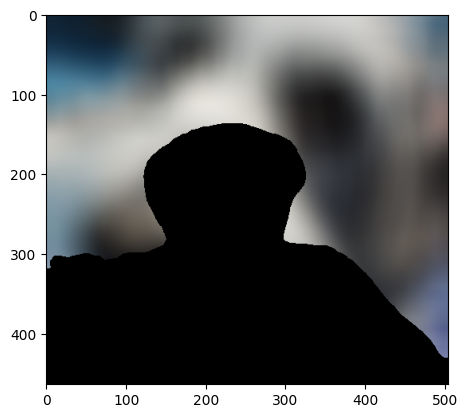

In [137]:
# 배경을 블러 처리하기 위해 '테리_resized' 이미지를 사용합니다.
# (51, 51)은 blurring kernel size를 뜻합니다. 다양하게 바꿔보세요.
terry_blurred = cv2.blur(테리_resized, (51, 51))

# 'mask_color'는 이미 3채널 컬러 마스크입니다 (클래스 ID 15, 즉 사람).
# 이 마스크를 반전시켜 배경 마스크를 얻습니다.
# cv2.bitwise_not(): 이미지가 반전됩니다. 사람이 255인 부분이 0이 되고, 배경이 0인 부분이 255가 됩니다.
background_mask = cv2.bitwise_not(mask_color)

# cv2.bitwise_and()를 사용하여 블러 처리된 테리 이미지에서 배경만 남깁니다.
# 사람 영역은 마스크가 0이므로, 결과 이미지에서 사람 영역은 0이 됩니다.
blurred_background_only = cv2.bitwise_and(terry_blurred, background_mask)

plt.imshow(cv2.cvtColor(blurred_background_only, cv2.COLOR_BGR2RGB))
plt.show()

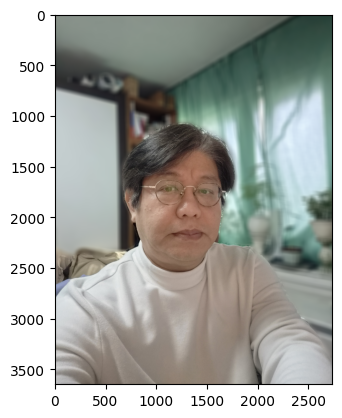

In [33]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

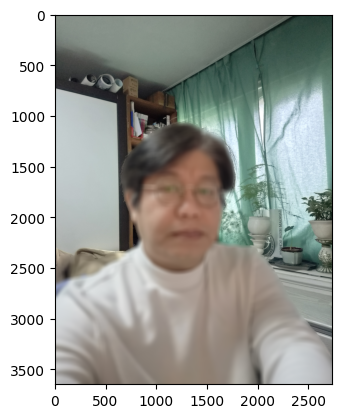

In [34]:
# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_concat = np.where(img_mask_color == 255, img_orig_blur, img_orig)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

In [35]:
!pip install opencv-python pixellib

In [36]:
import cv2
import numpy as np
import torch
import torchvision.transforms as T
from torchvision.models.segmentation import deeplabv3_resnet101
import matplotlib.pyplot as plt

print(cv2.__version__)

4.11.0


원본 테리 이미지 크기: (2788, 3024, 3)
배경 이미지 크기: (988, 1876, 3)


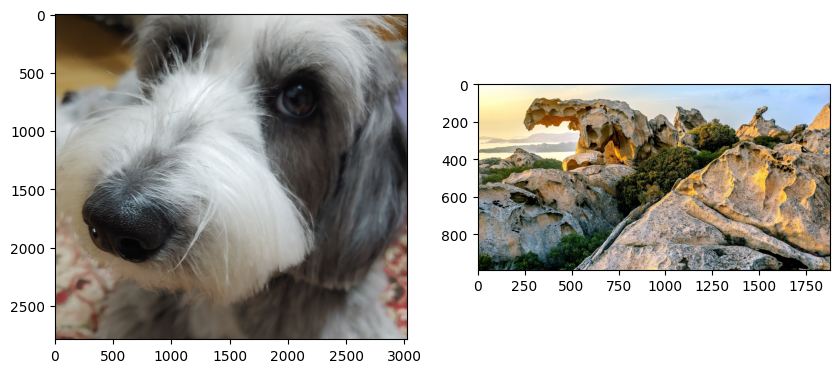

In [98]:
테리_img_path = "테리.jpg"  # 테리 이미지를 준비해주세요
배경_img_path = "배경.png"  # 배경 이미지 파일 확장자를 .png로 수정

테리_img = cv2.imread(테리_img_path)
배경_img = cv2.imread(배경_img_path)

# 이미지가 제대로 로드되었는지 확인합니다.
if 테리_img is None:
    print(f"오류: '{테리_img_path}' 파일을 찾거나 로드할 수 없습니다. 파일이 현재 디렉토리에 있는지 확인해 주세요.")
else:
    테리_img = cv2.cvtColor(테리_img, cv2.COLOR_BGR2RGB)

if 배경_img is None:
    print(f"오류: '{배경_img_path}' 파일을 찾거나 로드할 수 없습니다. 파일이 현재 디렉토리에 있는지 확인해 주세요.")
else:
    배경_img = cv2.cvtColor(배경_img, cv2.COLOR_BGR2RGB)

# 두 이미지 모두 성공적으로 로드된 경우에만 출력 및 시각화를 진행합니다.
if 테리_img is not None and 배경_img is not None:
    print(f"원본 테리 이미지 크기: {테리_img.shape}")
    print(f"배경 이미지 크기: {배경_img.shape}")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(테리_img) # 변수 이름 수정

    plt.subplot(1, 2, 2)
    plt.imshow(배경_img) # 변수 이름 수정

    plt.show()
else:
    print("이미지 로드에 실패하여 이미지를 표시할 수 없습니다.")

원본 테리 이미지 크기: (2788, 3024, 3)
배경 이미지 크기: (988, 1876, 3)


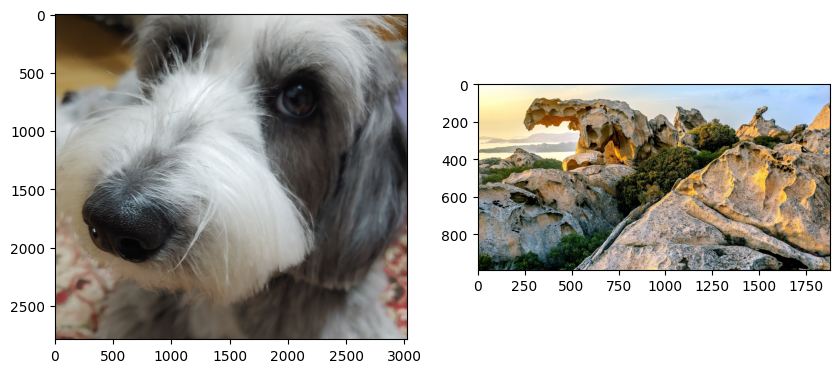

In [112]:
테리_img_path = "테리.jpg"
sand_img_path = "배경.png"

테리_img = cv2.imread(테리_img_path)
배경_img = cv2.imread(배경_img_path)

# 이미지가 제대로 로드되었는지 확인합니다.
if 테리_img is None:
    print(f"오류: '{테리_img_path}' 파일을 찾거나 로드할 수 없습니다. 파일이 현재 디렉토리에 있는지 확인해 주세요.")
    # 여기서 추가적인 처리를 할 수 있습니다 (예: 프로그램 종료 또는 기본 이미지 사용)
else:
    테리_img = cv2.cvtColor(테리_img, cv2.COLOR_BGR2RGB)

if 배경_img is None:
    print(f"오류: '{배경_img_path}' 파일을 찾거나 로드할 수 없습니다. 파일이 현재 디렉토리에 있는지 확인해 주세요.")
else:
    배경_img = cv2.cvtColor(배경_img, cv2.COLOR_BGR2RGB)

# 두 이미지 모두 성공적으로 로드된 경우에만 출력 및 시각화를 진행합니다.
if 테리_img is not None and 배경_img is not None:
    print(f"원본 테리 이미지 크기: {테리_img.shape}")
    print(f"배경 이미지 크기: {배경_img.shape}")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(테리_img)

    plt.subplot(1, 2, 2)
    plt.imshow(배경_img)

    plt.show()
else:
    print("이미지 로드에 실패하여 이미지를 표시할 수 없습니다.")

In [113]:
# 마스크를 원본 크기로 Resize
output_predictions_resized = cv2.resize(output_predictions, (테리_img.shape[1], 테리_img.shape[0]), interpolation=cv2.INTER_NEAREST)

print(f"추론 마스크 크기 (After Resize): {output_predictions_resized.shape}")

추론 마스크 크기 (After Resize): (2788, 3024)


In [115]:
import os

# 현재 폴더의 파일 목록 출력
files = os.listdir('/content')
print("현재 업로드된 파일 목록:", files)

현재 업로드된 파일 목록: ['.config', '테리.jpg', '배경.png', '.ipynb_checkpoints', 'sample_data']


In [116]:
unique_classes = np.unique(output_predictions_resized)
print(f"예측된 클래스 ID: {unique_classes}")

예측된 클래스 ID: [ 0 15]


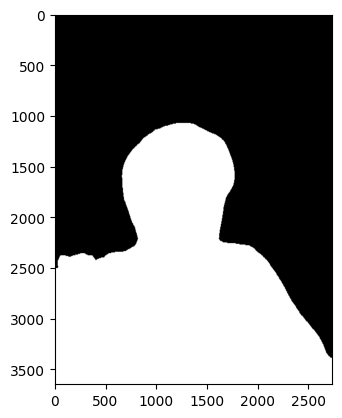

In [139]:
target_class_id = unique_classes[-1]

seg_map = (output_predictions_resized == target_class_id)
img_mask = seg_map.astype(np.uint8) * 255

plt.imshow(img_mask, cmap='gray')
plt.show()

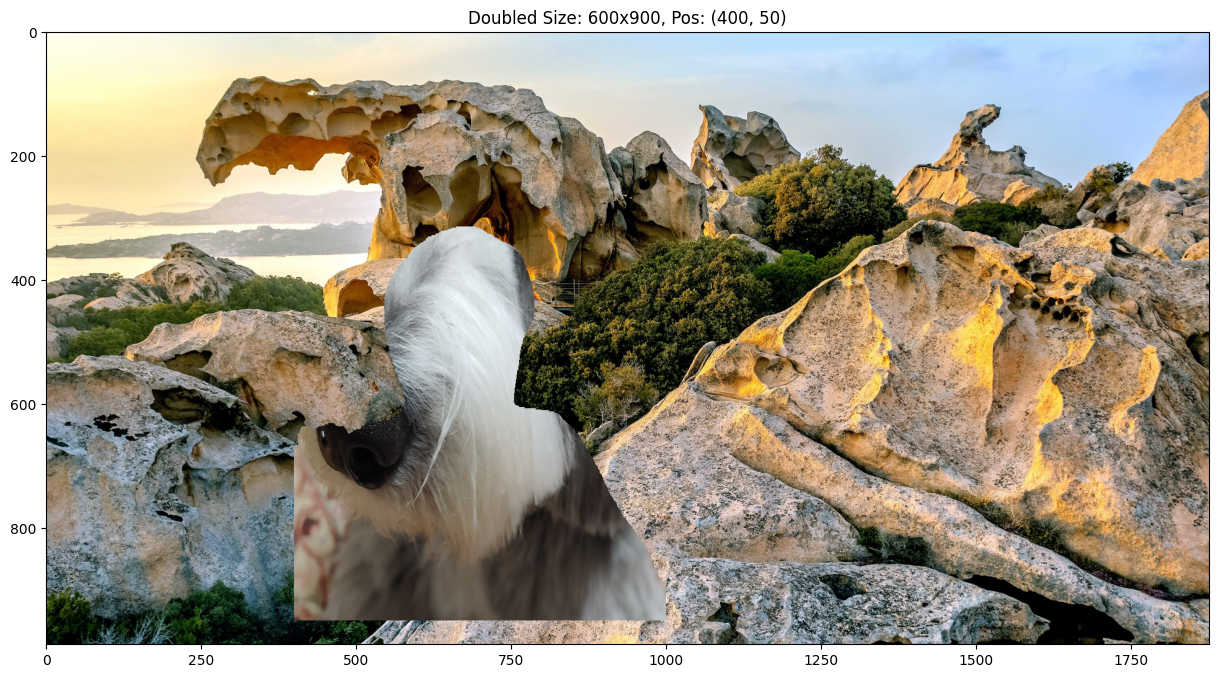

In [149]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- [STEP 1] 테리 이미지 준비 (1:1 크롭) ---
original_height, original_width = 테리_img.shape[:2]
min_dim = min(original_height, original_width)
x_start = (original_width - min_dim) // 2
y_start = (original_height - min_dim) // 2
테리_cropped = 테리_img[y_start : y_start + min_dim, x_start : x_start + min_dim]

# --- [STEP 2] 크기 및 비율 설정 (여기를 수정하세요!) ---
# 1:1이 아니라 얼굴 틀에 맞게 높이(height)를 더 키울 수 있습니다.
target_width = 600   # 가로 크기
target_height = 900  # 세로 크기 (찌그러져 보이면 이 숫자를 더 키우세요)

# 테리와 마스크를 설정한 크기로 확대/축소
테리_final = cv2.resize(테리_cropped, (target_width, target_height), interpolation=cv2.INTER_CUBIC)
mask_resized = cv2.resize(output_predictions, (target_width, target_height), interpolation=cv2.INTER_NEAREST)

# 마스크 생성 (마지막 클래스 ID 사용)
unique_classes = np.unique(output_predictions)
target_class_id = unique_classes[-1]
seg_map = (mask_resized == target_class_id).astype(np.uint8) * 255
mask_color = cv2.cvtColor(seg_map, cv2.COLOR_GRAY2RGB)

# --- [STEP 3] 위치 설정 ---
y_offset = 50  # 아래로 내리려면 숫자를 키우세요
x_offset = 400  # 오른쪽으로 밀려면 숫자를 키우세요

# --- [STEP 4] 합성 (ROI 방식) ---
result_final = 배경_img.copy()
bg_h, bg_w = 배경_img.shape[:2]

# 배경 범위를 벗어나지 않도록 크기 재조정 (Safety Crop)
h = min(target_height, bg_h - y_offset)
w = min(target_width, bg_w - x_offset)

# 영역 추출 및 합성
roi = result_final[y_offset : y_offset + h, x_offset : x_offset + w]
result_roi = np.where(mask_color[:h, :w] == 255, 테리_final[:h, :w], roi)
result_final[y_offset : y_offset + h, x_offset : x_offset + w] = result_roi

# --- [STEP 5] 출력 ---
plt.figure(figsize=(15, 15))
plt.imshow(result_final)
plt.title(f"Doubled Size: {target_width}x{target_height}, Pos: ({x_offset}, {y_offset})")
plt.axis('on') # 좌표 확인을 위해 눈금을 켭니다
plt.show()

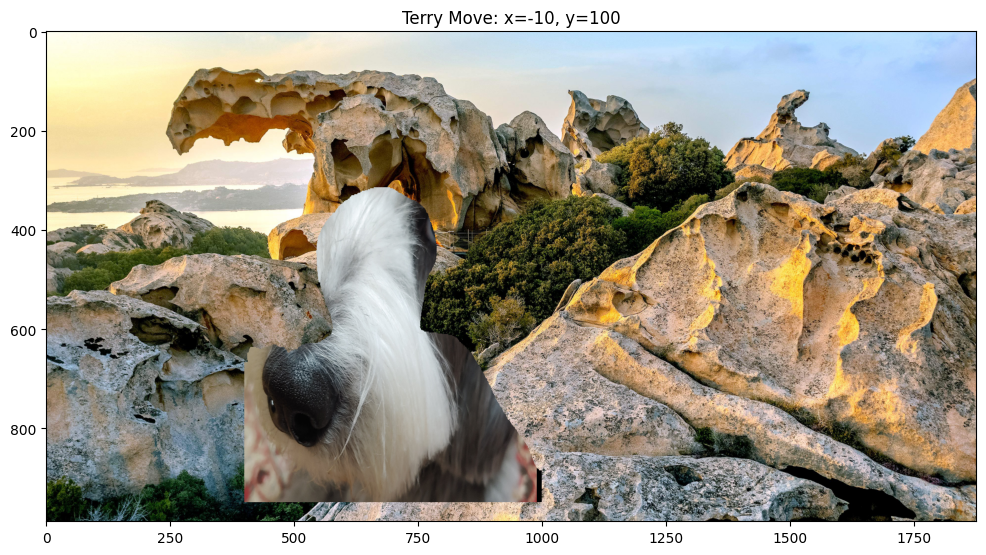

In [155]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- [STEP 1] 크기 설정 (창문 크기) ---
window_w = 600   # 마스크 구멍의 가로 크기
window_h = 900   # 마스크 구멍의 세로 크기

# 마스크와 테리를 일단 동일하게 리사이즈
테리_resized = cv2.resize(테리_img, (window_w, window_h), interpolation=cv2.INTER_CUBIC)
mask_resized = cv2.resize(output_predictions, (window_w, window_h), interpolation=cv2.INTER_NEAREST)

# 15번 클래스 마스크 생성
seg_map = (mask_resized == np.unique(output_predictions)[-1]).astype(np.uint8) * 255

# --- [STEP 2] 테리 사진만 미세 이동 (레이어 이동) ---
# 마스크 안에서 테리 사진만 움직입니다.
terry_x_move = -10  # (+)면 오른쪽, (-)면 왼쪽으로 테리만 이동
terry_y_move = +100   # (+)면 아래쪽, (-)면 위쪽으로 테리만 이동

# 테리 이미지를 이동시킬 행렬(Translation Matrix) 생성
M = np.float32([[1, 0, terry_x_move], [0, 1, terry_y_move]])
테리_moved = cv2.warpAffine(테리_resized, M, (window_w, window_h))

# --- [STEP 3] 최종 위치 및 합성 ---
y_offset = 50   # 배경 위에서 마스크(구멍) 자체가 놓일 위치
x_offset = 400

result_final = 배경_img.copy()
bg_h, bg_w = 배경_img.shape[:2]

# 안전 영역 계산
h = min(window_h, bg_h - y_offset)
w = min(window_w, bg_w - x_offset)

# ROI 추출
roi = result_final[y_offset : y_offset + h, x_offset : x_offset + w]

# 3채널 마스크화
mask_color = cv2.cvtColor(seg_map[:h, :w], cv2.COLOR_GRAY2RGB)

# 합성: Moved된 테리 사진을 마스크에 맞춰 배경(roi) 위에 얹음
result_roi = np.where(mask_color == 255, 테리_moved[:h, :w], roi)
result_final[y_offset : y_offset + h, x_offset : x_offset + w] = result_roi

# --- [STEP 4] 출력 ---
plt.figure(figsize=(12, 12))
plt.imshow(result_final)
plt.title(f"Terry Move: x={terry_x_move}, y={terry_y_move}")
plt.show()

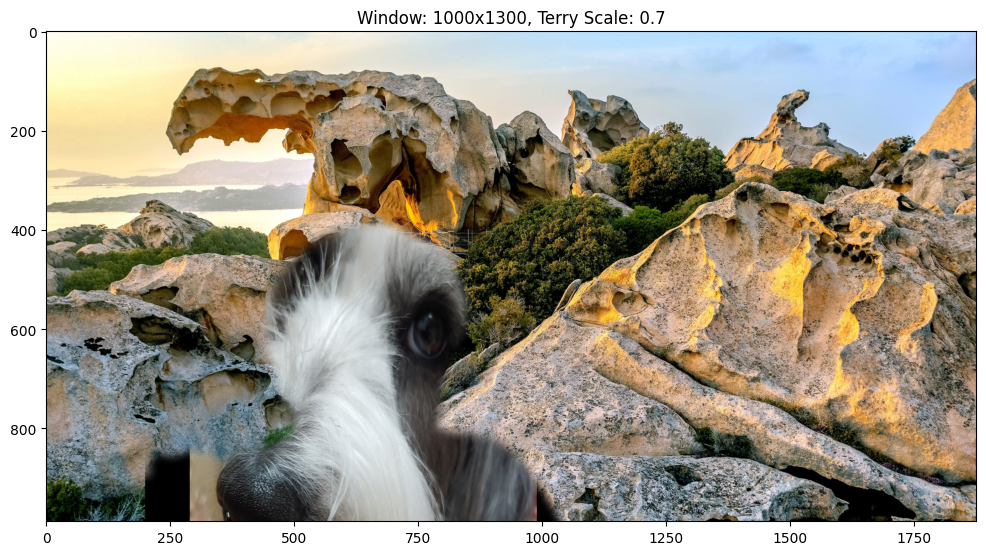

In [179]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- [STEP 1] 마스크(창문) 크기 설정 (더 크게!) ---
window_w = 1000   # 마스크 구멍 가로 (기존 600에서 키움)
window_h = 1300  # 마스크 구멍 세로 (기존 900에서 키움)

# --- [STEP 2] 테리 사진 크기 설정 (창문보다 작게!) ---
# 창문 크기의 80% 정도로 테리를 줄여서 여유를 줍니다.
terry_scale = 0.7  # 1.0보다 작으면 테리가 마스크 안에서 작아집니다.
terry_w = int(window_w * terry_scale)
terry_h = int(window_h * terry_scale)

# 테리와 마스크 각각 리사이즈
테리_resized = cv2.resize(테리_img, (terry_w, terry_h), interpolation=cv2.INTER_CUBIC)
mask_resized = cv2.resize(output_predictions, (window_w, window_h), interpolation=cv2.INTER_NEAREST)

# 15번 클래스 마스크 생성
seg_map = (mask_resized == np.unique(output_predictions)[-1]).astype(np.uint8) * 255
seg_map = cv2.GaussianBlur(seg_map, (15, 15), 0)

# --- [STEP 3] 테리를 마스크 중앙(또는 원하는 곳)에 배치 ---
# 테리가 마스크보다 작으므로, 마스크 도화지(검은색) 위에 테리를 먼저 얹습니다.
terry_layer = np.zeros((window_h, window_w, 3), dtype=np.uint8)

# 테리를 마스크 내 어디에 둘지 결정 (중앙 배치 예시)
start_y = (window_h - terry_h) // 2 + 50 # 50은 미세 조정(아래로)
start_x = (window_w - terry_w) // 2

terry_layer[start_y : start_y + terry_h, start_x : start_x + terry_w] = 테리_resized

# --- [STEP 4] 테리 레이어 미세 이동 (선택 사항) ---
terry_x_move = -60
terry_y_move = +120
M = np.float32([[1, 0, terry_x_move], [0, 1, terry_y_move]])
테리_final_layer = cv2.warpAffine(terry_layer, M, (window_w, window_h))

# --- [STEP 5] 배경과 최종 합성 ---
y_offset = 5   # 배경 위 마스크 위치
x_offset = 200

result_final = 배경_img.copy()
bg_h, bg_w = 배경_img.shape[:2]

h = min(window_h, bg_h - y_offset)
w = min(window_w, bg_w - x_offset)

# 1. 마스크를 0~1 사이의 투명도(alpha) 값으로 변환
# 가우시안 블러 숫자를 크게(예: 15, 15) 하면 더 뽀샤시해집니다.
blur_size = 51
soft_mask = cv2.GaussianBlur(seg_map[:h, :w], (blur_size, blur_size), 0)
alpha = cv2.cvtColor(soft_mask, cv2.COLOR_GRAY2RGB).astype(float) / 255.0

# 2. 합성할 영역(ROI) 추출
roi = result_final[y_offset : y_offset + h, x_offset : x_offset + w].astype(float)
terry_part = 테리_final_layer[:h, :w].astype(float)

# 3. 알파 블렌딩 공식 적용 (테리 * 투명도 + 배경 * (1-투명도))
# 이 공식을 쓰면 경계선이 안개처럼 부드럽게 섞입니다.
blended = terry_part * alpha + roi * (1.0 - alpha)
result_final[y_offset : y_offset + h, x_offset : x_offset + w] = blended.astype(np.uint8)

# --- [STEP 6] 출력 ---
plt.figure(figsize=(12, 12))
plt.imshow(result_final)
plt.title(f"Window: {window_w}x{window_h}, Terry Scale: {terry_scale}")
plt.show()